In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import cv2
import rad_target_detection as rtd

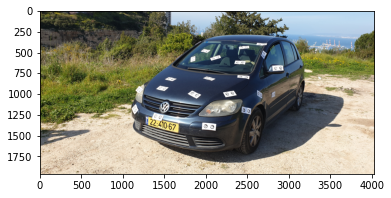

In [2]:
# load image
image = cv2.imread(r'Shaul_Car\20210313_144617.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # rgb image
rgb_img = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # gray image

plt.imshow(rgb_img)
plt.show()

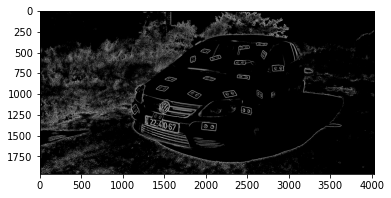

In [3]:
# firstly we will threshold the image to make it binary
binary_img = rtd.binarize_image(gray)

plt.imshow(binary_img, cmap='gray')
plt.show()

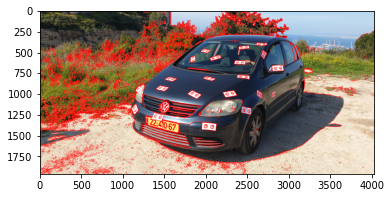

In [4]:
# getting contours of the binary image
contour_thresh=5

contours = rtd.contour_image(binary_img, contour_thresh)
c_img = rgb_img.copy()
cv2.drawContours(c_img, contours, -1, (255, 0, 0), 2)
plt.imshow(c_img)
plt.show()

In [5]:
# next step is to fit ellipses to the contours and filter out ones that cannot be candidates for target
ellipses, hulls = rtd.find_ellipses(contours)

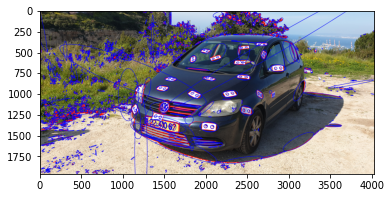

In [13]:
for i, ellip in enumerate(ellipses):
    rtd.draw_ellipse(c_img, ellip[0], ellip[1], ellip[2], 0, 360, (0, 0, 255))
plt.imshow(c_img)
plt.show()

In [6]:
# find concentric ellipses, check to see if ratio applies between each pair of concentric ellipses
rad_targets = rtd.find_rad_targets(ellipses, lower_thresh=3.5, upper_thresh=7.5)

In [7]:
# coding each target by it's shape
targets_df = rtd.targets_encoding(binary_img, rad_targets)

-1
110011110001
-1
110000001001
110000001011
101001110110
-1
100000000001
-1
111000111111
-1
111011111110
-1
110001110011
-1
-1
-1
-1
-1
111111001001
111110000001
-1
-1
-1
-1
-1
-1
111001000011
-1
111000011011
-1
-1
111111110101
-1
-1
-1
110100100000
111011000100
101000000000
110111000101
101011111101
-1
-1
-1
101000001111
101000001111
100110000110


In [ ]:
# color map for the data
cmap = rtd.get_cmap_string(palette='viridis', domain=targets_df['code'])
targets_df['color'] = targets_df['code'].apply(cmap)

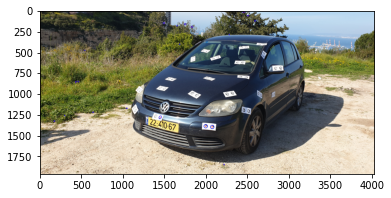

In [8]:
# drawing found targets on img
rtd.draw_targets(rgb_img, targets_df)
plt.imshow(rgb_img)
plt.show()